# Facebook Ad-Campaign Analysis

### Loading of data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('sales-data.csv')

### Viewing the numbers

In [2]:
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


In [3]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


### Checking for null values and cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.shape

(1143, 11)

##### Since there is 1143 non-null values in each column and there are 1143 columns, then there are no null values

### Finding categorical columns and numerical columns

In [6]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == 'object']
categorical_columns

['age', 'gender']

##### But age is not categorical, so let's parse out the age range into a 'Age_Min' column and a 'Age_Max' column

In [7]:
df['Age_Min'] = df['age'].apply(lambda x: int(x.split('-')[0]))
df['Age_Max'] = df['age'].apply(lambda x: int(x.split('-')[1]))
categorical_columns = [cname for cname in df.columns if df[cname].dtype == 'object']
categorical_columns

['age', 'gender']

##### But the interest is also categorical despite being a numerical value

In [8]:
categorical_columns.append('interest')
categorical_columns

['age', 'gender', 'interest']

In [9]:
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Age_Min,Age_Max
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,30,34
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,30,34
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,30,34


In [10]:
numerical_columns = [cname for cname in df.columns if (df[cname].dtype != 'object') and (cname != 'interest')]
numerical_columns

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion',
 'Age_Min',
 'Age_Max']

### Finding correlations in the data

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

correlation_columns = [cname for cname in numerical_columns if cname not in ['ad_id', 'xyz_campaign_id', 'fb_campaign_id']]
correlation_columns

['Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion',
 'Age_Min',
 'Age_Max']

<AxesSubplot:>

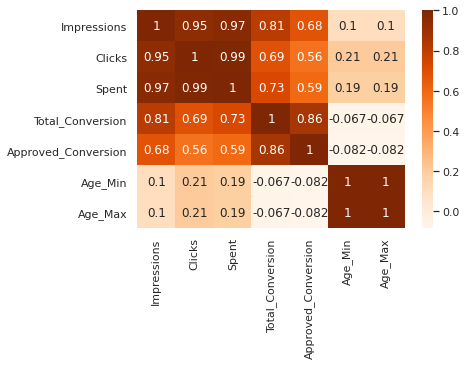

In [12]:
sns.heatmap(df[correlation_columns].corr(), annot=True, cmap='Oranges')

##### So as expected there is a high correlation between the amount spent on the ad and the impressions, as Facebook will display it to more people

### Analyzing the campaigns

In [13]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

So we see that there were only 3 campaigns run during the experiment

In [14]:
df['xyz_campaign_id'] = df['xyz_campaign_id'].replace({916: 'campaign_1', 936: 'campaign_2', 1178: 'campaign_3'})

##### Grouping by the sum of each item involved in the campaign

In [15]:
grouped_campaigns_sum = df.groupby('xyz_campaign_id').sum()
grouped_campaigns_sum = grouped_campaigns_sum.drop(['ad_id', 'fb_campaign_id', 'interest', 'Age_Min', 'Age_Max'], axis=1)
grouped_campaigns_sum['xyz_campaign_id'] = grouped_campaigns_sum.index
grouped_campaigns_sum

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,xyz_campaign_id
xyz_campaign_id,,,,,,
campaign_1,482925,113,149.710001,58,24,campaign_1
campaign_2,8128187,1984,2893.369999,537,183,campaign_2
campaign_3,204823716,36068,55662.149959,2669,872,campaign_3


Text(0.5, 1.0, 'Number of impressions for each campaign')

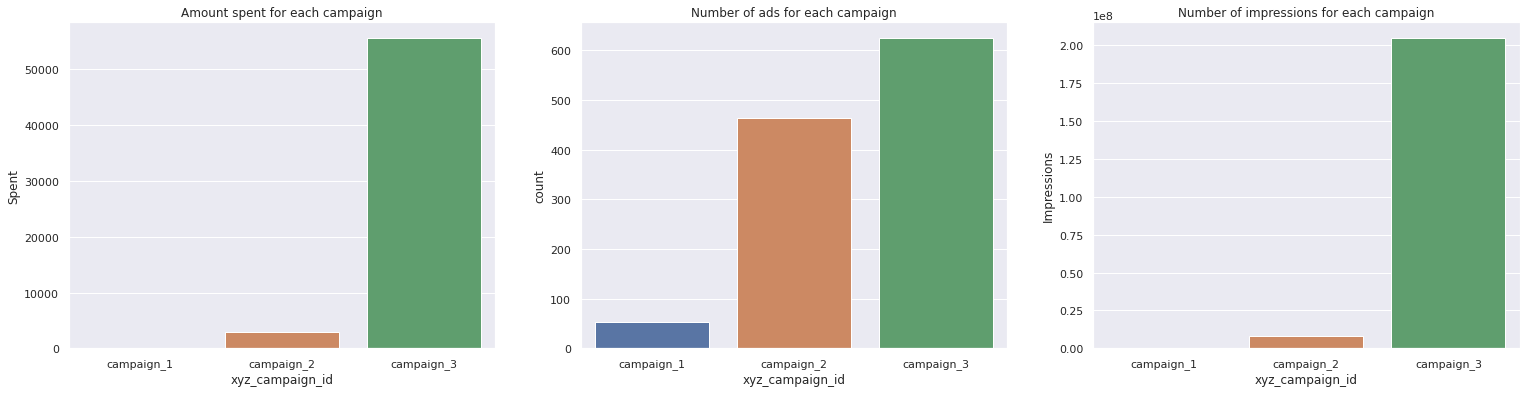

In [16]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(26, 6)

costplt = sns.barplot(x='xyz_campaign_id', y='Spent', data=grouped_campaigns_sum, ci=None, ax=axs[0])
costplt.set_title('Amount spent for each campaign')

countplt = sns.countplot(x='xyz_campaign_id', data=df, ax=axs[1])
countplt.set_title('Number of ads for each campaign')

impressionplt = sns.barplot(x='xyz_campaign_id', y='Impressions', data=grouped_campaigns_sum, ci=None, ax=axs[2])
impressionplt.set_title('Number of impressions for each campaign')

It can be seen that campaign_3 had the highest amount of Facebook ads, as well as the highest amount of impressions and the highest amount spent for the campaign

##### Grouping by the count of each item involved in the campaign

In [17]:
grouped_campaigns_count = df.groupby('xyz_campaign_id').count()
grouped_campaigns_count

,ad_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Age_Min,Age_Max
xyz_campaign_id,,,,,,,,,,,,
campaign_1,54,54,54,54,54,54,54,54,54,54,54,54
campaign_2,464,464,464,464,464,464,464,464,464,464,464,464
campaign_3,625,625,625,625,625,625,625,625,625,625,625,625


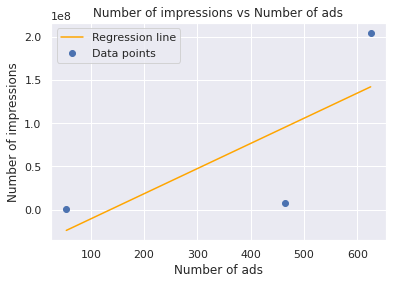

In [18]:
plt.scatter(grouped_campaigns_count['Impressions'], grouped_campaigns_sum['Impressions'], label='Data points')

m, b = np.polyfit(grouped_campaigns_count['Impressions'], grouped_campaigns_sum['Impressions'], 1)
plt.plot(grouped_campaigns_count['Impressions'], grouped_campaigns_count['Impressions'] * m + b, color='orange', label='Regression line')

plt.xlabel('Number of ads')
plt.ylabel('Number of impressions')
plt.title('Number of impressions vs Number of ads')
plt.legend()

It appears that there is a possible positive linear trend between the number of ads and the number of impressions however there is not enough data to further investigate this correlation

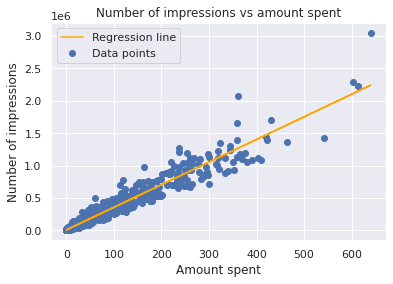

In [19]:
plt.scatter(df['Spent'], df['Impressions'], label='Data points')

m, b = np.polyfit(df['Spent'], df['Impressions'], 1)
plt.plot(df['Spent'], df['Spent'] * m + b, color='orange', label='Regression line')

plt.xlabel('Amount spent')
plt.ylabel('Number of impressions')
plt.title('Number of impressions vs amount spent')
plt.legend()

It can be seen that there is a strong positive linear trend between the amount spent and the number of impressions from a large amount of data points

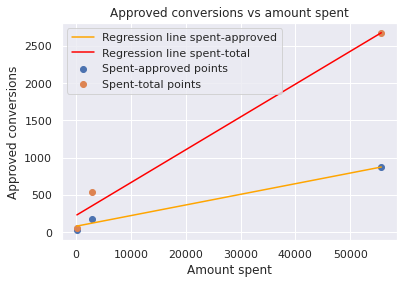

In [21]:
plt.scatter(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Approved_Conversion'], label='Spent-approved points')
plt.scatter(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Total_Conversion'], label='Spent-total points')

m, b = np.polyfit(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Approved_Conversion'], 1)
plt.plot(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Spent'] * m + b, color='orange', label='Regression line spent-approved')

m, b = np.polyfit(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Total_Conversion'], 1)
plt.plot(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Spent'] * m + b, color='red', label='Regression line spent-total')

plt.xlabel('Amount spent')
plt.ylabel('Approved conversions')
plt.title('Approved conversions vs amount spent')
plt.legend()

It appears that there is a positive linear relationship between the amount spent on ads and the approved conversions and the amount spent on ads vs the total conversions however there is not enough data to further test this correlation

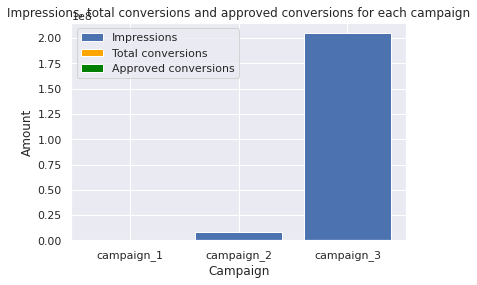

In [135]:
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Impressions'], color='b', label='Impressions')
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Total_Conversion'], color='orange', label='Total conversions')
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Approved_Conversion'], color='green', label='Approved conversions')
plt.xlabel('Campaign')
plt.ylabel('Amount')
plt.title('Impressions, total conversions and approved conversions for each campaign')
plt.legend()

It can be seen that the number of impressions is far greater than the total conversions and the approved conversions

##### Since the impressions is so much greater it is hard to visualize the comparison between the impressions, total conversions and approved conversions, let's just plot total conversions vs approved conversions down here

Text(0.5, 1.0, 'Conversion rate for each campaign')

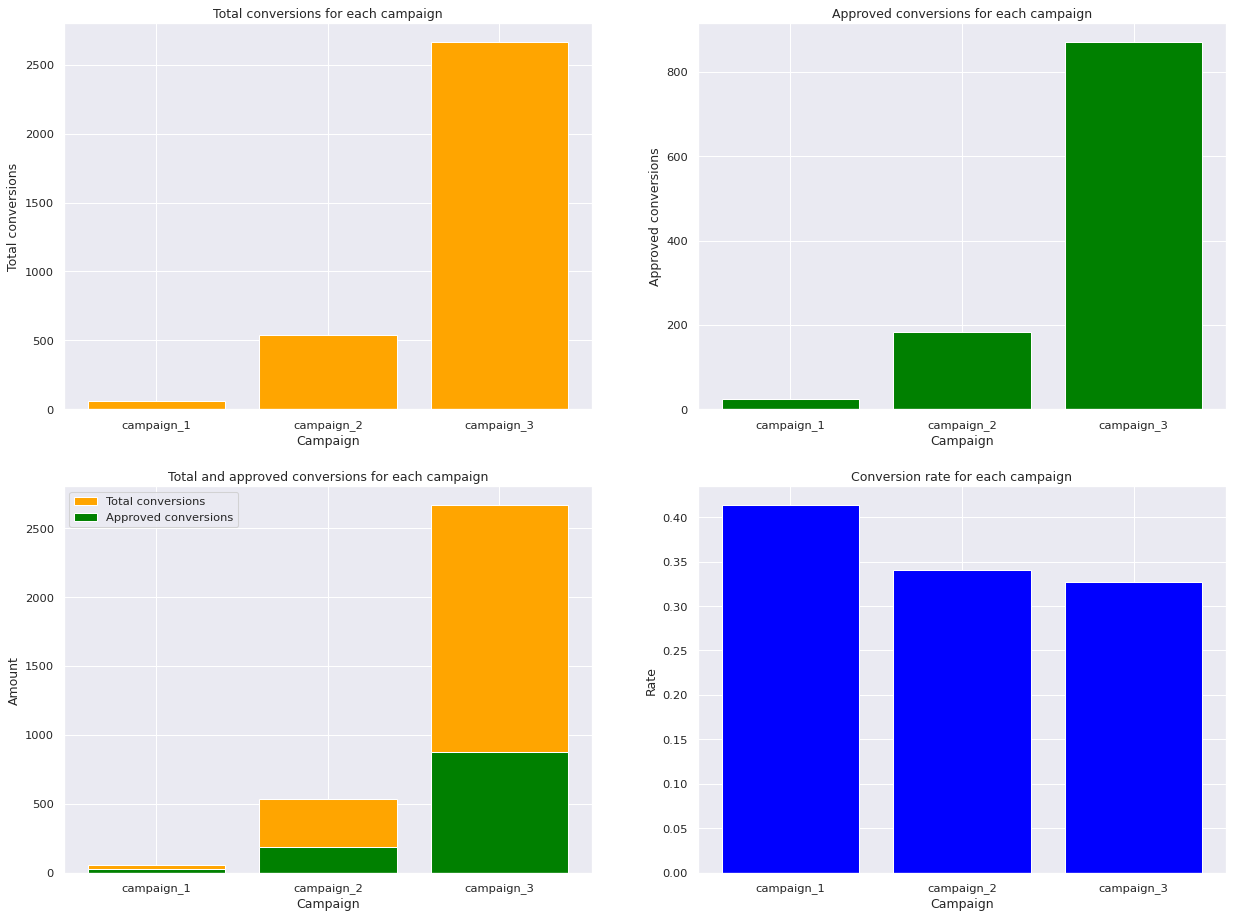

In [133]:
fig = plt.figure(figsize=(20,15), dpi=75)

ax1 = plt.subplot2grid((2,2),(0,0))
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Total_Conversion'], color='orange', label='Total conversions')
plt.xlabel('Campaign')
plt.ylabel('Total conversions')
plt.title('Total conversions for each campaign')

ax1 = plt.subplot2grid((2,2),(0,1))
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Approved_Conversion'], color='green', label='Approved conversions')
plt.xlabel('Campaign')
plt.ylabel('Approved conversions')
plt.title('Approved conversions for each campaign')

ax1 = plt.subplot2grid((2,2),(1,0))
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Total_Conversion'], color='orange', label='Total conversions')
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Approved_Conversion'], color='green', label='Approved conversions')
plt.xlabel('Campaign')
plt.ylabel('Amount')
plt.title('Total and approved conversions for each campaign')
plt.legend()

ax1 = plt.subplot2grid((2,2),(1,1))
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Approved_Conversion'] / grouped_campaigns_sum['Total_Conversion'], color='blue', label='Approved conversions')
plt.xlabel('Campaign')
plt.ylabel('Rate')
plt.title('Conversion rate for each campaign')

The total conversions and approved conversions was highest for campaign 3. It was found that campaign_1 had the highest conversion rate despite having the lowest amount of ads and the lowest budget, followed by campaign_2. It is hypothesized this is because when a company has a limited budget they compensate by creating better quality ads, rather than companies that have much more money and can afford to display a lesser quality ad to a greater amount of people.

##### Let's have a look at the different age categories and how they contributed to the sales

In [ ]:
# I might look at the distribution of the prices as well to figure out what people are mostly spending on ads - LOOK AT THE FREQUENCY FOR MOST OF THE CATEGORIES

In [ ]:
# First I want to look at the most popular age category to go to

In [ ]:
# Then I want to look at the age group that had the highest conversion count (I could go with a percentage instead)

In [ ]:
# Then I want to look at the age group that had the highest conversion rate for each campaign

In [ ]:
# Then I want to look at the gender counts

In [ ]:
# Then I want to look at the gender with the highest conversion count/rate

In [ ]:
# Then I want to look at the gender with the highest conversion rate for each campaign

In [ ]:
# Then I want to have a look at the interest

In [ ]:
# Then I want to have a look at the interest comparison for both genders

In [ ]:
# I still have not done anything with the clicks yet, YIKES might want to replace this instead of impressions and total conversions and such